In [224]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data10r = pd.read_csv('C:/Users/dip/Desktop/bigdata/final data/10 return.csv').drop('Unnamed: 0', axis=1)
data10v = pd.read_csv('C:/Users/dip/Desktop/bigdata/final data/10 variance.csv').drop('Unnamed: 0', axis=1)

data30r = pd.read_csv('C:/Users/dip/Desktop/bigdata/final data/30 return.csv').drop('Unnamed: 0', axis=1)
data30v = pd.read_csv('C:/Users/dip/Desktop/bigdata/final data/30 variance.csv').drop('Unnamed: 0', axis=1)

data60r = pd.read_csv('C:/Users/dip/Desktop/bigdata/final data/60 return.csv').drop('Unnamed: 0', axis=1)
data60v = pd.read_csv('C:/Users/dip/Desktop/bigdata/final data/60 variance.csv').drop('Unnamed: 0', axis=1)

data300r = pd.read_csv('C:/Users/dip/Desktop/bigdata/final data/300 return.csv').drop('Unnamed: 0', axis=1)
data300v = pd.read_csv('C:/Users/dip/Desktop/bigdata/final data/300 variance.csv').drop('Unnamed: 0', axis=1)

data600r = pd.read_csv('C:/Users/dip/Desktop/bigdata/final data/600 return.csv').drop('Unnamed: 0', axis=1)
data600v = pd.read_csv('C:/Users/dip/Desktop/bigdata/final data/600 variance.csv').drop('Unnamed: 0', axis=1)

data1440r = pd.read_csv('C:/Users/dip/Desktop/bigdata/final data/1440 return.csv').drop('Unnamed: 0', axis=1)
data1440v = pd.read_csv('C:/Users/dip/Desktop/bigdata/final data/1440 variance.csv').drop('Unnamed: 0', axis=1)

In [282]:
data1440v

,0
0,3.002951e-05
1,3.012732e-05
2,3.128572e-05
3,3.090465e-05
4,3.101322e-05
5,3.091480e-05
6,3.080272e-05
7,3.092383e-05
8,3.039625e-05
9,3.029637e-05


# GARCH  (Data Freq : 10min)

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
import statsmodels.api as sm

C:\Users\dip\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


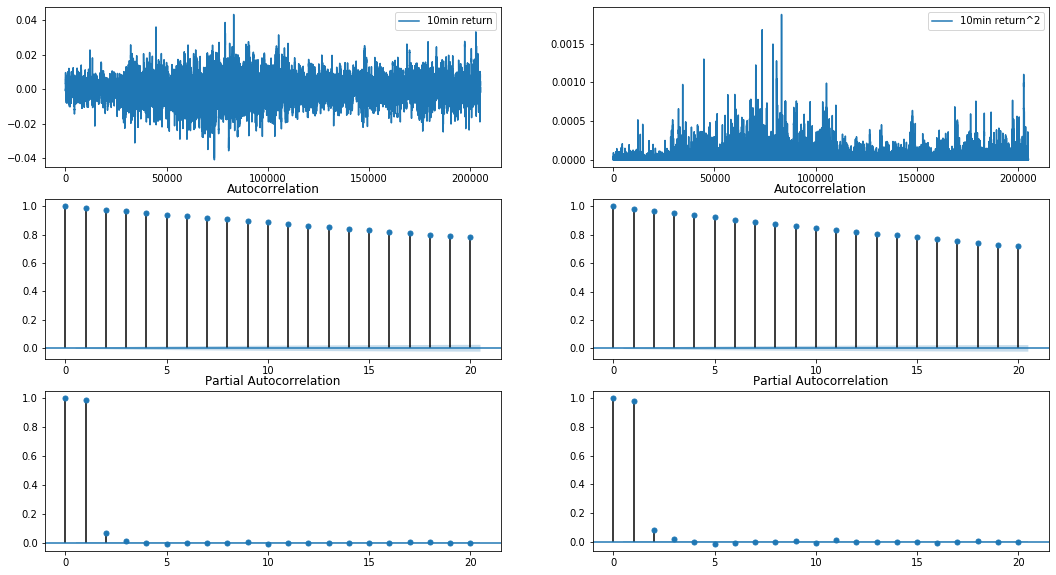

In [4]:
# 10min data visualization (raw plot, sq plot, acf & pacf plot)
fig = plt.figure(figsize=(2^16,2^8))

ax1 = fig.add_subplot(3,2,1)
ax1.plot(data10r, label="10min return")
ax1.legend()

ax2 = fig.add_subplot(3,2,2)
ax2.plot(data10r**2, label="10min return^2")
ax2.legend()

ax3 = plt.subplot(323)
sm.graphics.tsa.plot_acf(data10r, lags=20, ax=ax3)

ax4 = plt.subplot(324)
sm.graphics.tsa.plot_acf(data10r**2, lags=20, ax=ax4)

ax5 = plt.subplot(325)
sm.graphics.tsa.plot_pacf(data10r, lags=20, ax=ax5)

ax6 = plt.subplot(326)
sm.graphics.tsa.plot_pacf(data10r**2, lags=20, ax=ax6)

plt.show()

In [189]:
# 10min return AR(q) fitting
ARIMA_10mr = ARIMA(data10r, order=(1,0,0))
ARIMA_10mr_fit = ARIMA_10mr.fit()
print(ARIMA_10mr_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      0   No. Observations:               205203
Model:                     ARMA(1, 0)   Log Likelihood             1097043.042
Method:                       css-mle   S.D. of innovations              0.001
Date:                Sun, 20 Oct 2019   AIC                       -2194080.084
Time:                        14:49:14   BIC                       -2194049.389
Sample:                             0   HQIC                      -2194071.060
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.525e-05      0.000      0.081      0.936      -0.000       0.000
ar.L1.0        0.9865      0.000   2729.117      0.000       0.986       0.987
                                    Roots           

In [190]:
# 10min resid
resid_10mr = ARIMA_10mr_fit.resid
resid2_10mr = ARIMA_10mr_fit.resid**2

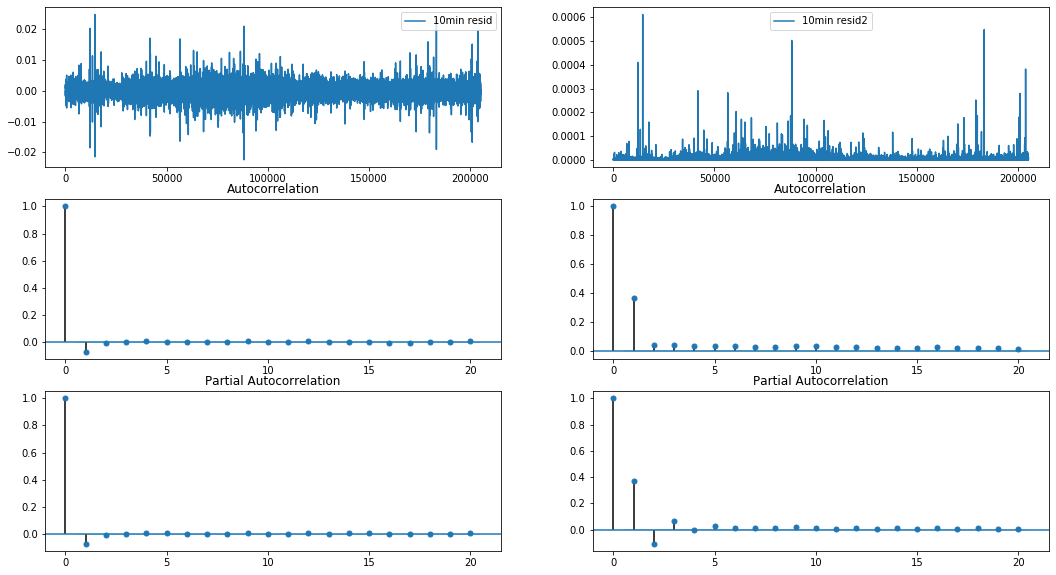

In [8]:
# 10min resid visualization (raw plot, sq plot, acf & pacf plot)
fig = plt.figure(figsize=(2^16,2^8))

ax1 = fig.add_subplot(3,2,1)
ax1.plot(resid_10mr, label="10min resid")
ax1.legend()

ax2 = fig.add_subplot(3,2,2)
ax2.plot(resid2_10mr, label="10min resid2")
ax2.legend()

ax3 = plt.subplot(323)
sm.graphics.tsa.plot_acf(resid_10mr, lags=20, ax=ax3)

ax4 = plt.subplot(324)
sm.graphics.tsa.plot_acf(resid2_10mr, lags=20, ax=ax4)

ax5 = plt.subplot(325)
sm.graphics.tsa.plot_pacf(resid_10mr, lags=20, ax=ax5)

ax6 = plt.subplot(326)
sm.graphics.tsa.plot_pacf(resid2_10mr, lags=20, ax=ax6)

plt.show()

In [191]:
# Resid White Test (Test for Heteroscedastictiy)

from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

# Residual^2 OLS
f_10 = 'data10r~data10r.shift(-1)'
data10mr_ols = ols(formula=f_10, data=data10r).fit()

#white_test
white_test = het_white(data10mr_ols.resid, data10mr_ols.model.exog)

labels = ['LM Statistic', 'LM-Test p-value','F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'LM Statistic': 536.010778654083, 'LM-Test p-value': 4.043321684401601e-117, 'F-Statistic': 268.7033546401459, 'F-Test p-value': 2.858648462696208e-117}


In [192]:
# GARCH fitting
data10mr_GARCH = arch_model(resid_10mr, mean='Constant', vol='GARCH', p=1, q=1, dist='Normal', rescale=False)
data10mr_GARCH_fit = data10mr_GARCH.fit()
print(data10mr_GARCH_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: -1115011.4932188943
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -1115011.4922952515
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1


C:\Users\dip\Anaconda3\lib\site-packages\arch\univariate\base.py:605: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:            1.11501e+06
Distribution:                  Normal   AIC:                      -2.23001e+06
Method:            Maximum Likelihood   BIC:                      -2.22997e+06
                                        No. Observations:               205203
Date:                Sun, Oct 20 2019   Df Residuals:                   205199
Time:                        14:49:38   Df Model:                            4
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         8.8196e-10  1.256e-06  7.024e-04      0.999 

In [214]:
#garch(1,1) volatility fitting
def garplot (ome, a, b, resid2_10mr, data10v):
    
    garchvol = []
    for i in range(0,data10v.shape[0],1):
        gvol = ome + a * resid2_10mr.iloc[i] + b * data10v.iloc[i]
        garchvol.append(gvol[0])
    return np.array(garchvol)

garchvol=garplot(2.660442e-08, 0.1, 0.88, resid2_10mr, data10v)

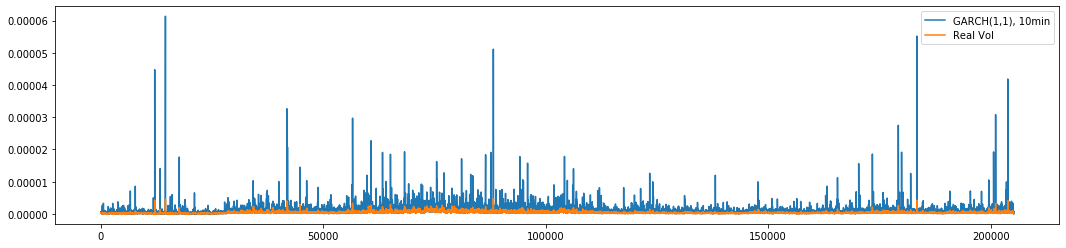

In [487]:
fig = plt.figure(figsize=(2^16,2^6))
plt.plot(garchvol, label="GARCH(1,1), 10min")
plt.plot(data10v, label="Real Vol")
plt.legend()
plt.show()

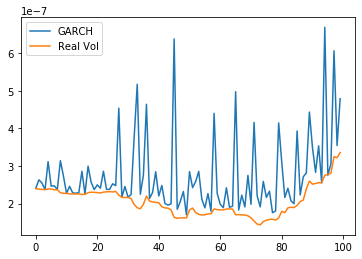

In [521]:
plt.plot(garchvol[:100], label="GARCH")
plt.plot(data10v[:100], label="Real Vol")
plt.legend()
plt.show()

In [493]:
garchvol[:10]

array([2.40285007e-07, 2.63020093e-07, 2.54582984e-07, 2.36848130e-07,
       3.11359007e-07, 2.46112658e-07, 2.47189258e-07, 2.37462185e-07,
       3.13861150e-07, 2.72799188e-07])

In [494]:
data10v[:10]

,0
0,2.396192e-07
1,2.382663e-07
2,2.375097e-07
3,2.373299e-07
4,2.386443e-07
5,2.386224e-07
6,2.367798e-07
7,2.366514e-07
8,2.287160e-07
9,2.270666e-07


In [495]:
resid2_10mr[:10]

0    2.815717e-08
1    2.674129e-07
2    1.897007e-07
3    1.393418e-08
4    7.474756e-07
5    9.520490e-08
6    1.221858e-07
7    2.604545e-08
8    8.598663e-07
9    4.637617e-07
dtype: float64

In [403]:
# 10min GARCH Vol STD
garchvol_std = garchvol.reshape(205203,1)
garchvol_std=garchvol_std.T[0][:-1]

data10v_std = np.array(data10v)
data10v_std=data10v_std.T[0][:-1]

garchvol10_std = (garchvol_std - data10v_std).std()
garchvol10_std

4.951996120924322e-07

In [475]:
garchvol10_sq = (garchvol_std - data10v_std) ** 2
sum(garchvol10_sq)

5.245760452120979e-08

In [519]:
sum(data10mr_GARCH_fit.resid**2)

0.272965306172164

# GARCH  (Data Freq : 30min)

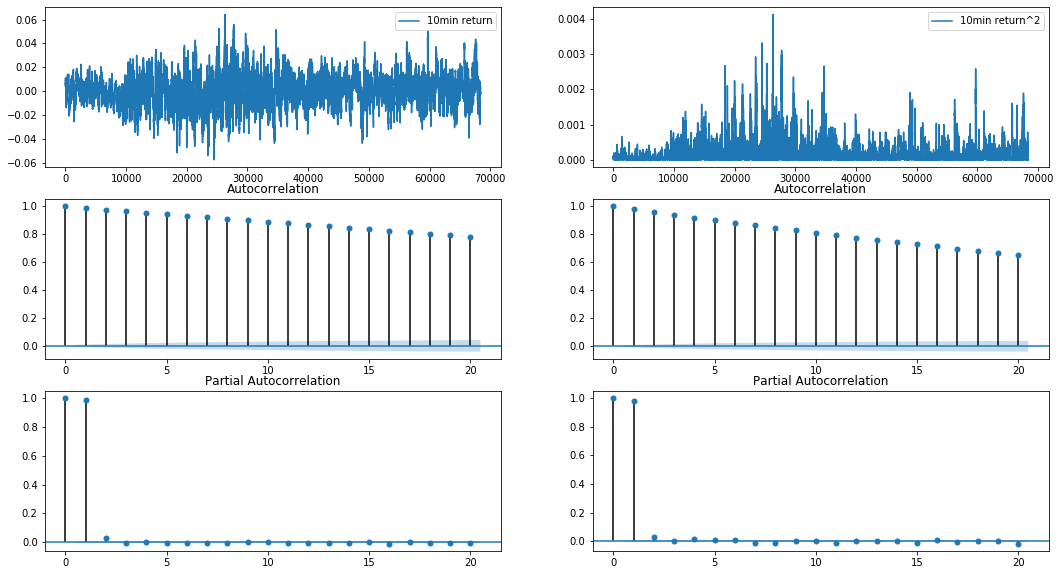

In [225]:
# 30min data visualization (raw plot, sq plot, acf & pacf plot)
fig = plt.figure(figsize=(2^16,2^8))

ax1 = fig.add_subplot(3,2,1)
ax1.plot(data30r, label="10min return")
ax1.legend()

ax2 = fig.add_subplot(3,2,2)
ax2.plot(data30r**2, label="10min return^2")
ax2.legend()

ax3 = plt.subplot(323)
sm.graphics.tsa.plot_acf(data30r, lags=20, ax=ax3)

ax4 = plt.subplot(324)
sm.graphics.tsa.plot_acf(data30r**2, lags=20, ax=ax4)

ax5 = plt.subplot(325)
sm.graphics.tsa.plot_pacf(data30r, lags=20, ax=ax5)

ax6 = plt.subplot(326)
sm.graphics.tsa.plot_pacf(data30r**2, lags=20, ax=ax6)

plt.show()

In [226]:
# 30min return AR(q) fitting
ARIMA_30mr = ARIMA(data30r, order=(1,0,0))
ARIMA_30mr_fit = ARIMA_30mr.fit()
print(ARIMA_30mr_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      0   No. Observations:                68400
Model:                     ARMA(1, 0)   Log Likelihood              328775.986
Method:                       css-mle   S.D. of innovations              0.002
Date:                Sun, 20 Oct 2019   AIC                        -657545.971
Time:                        15:15:15   BIC                        -657518.572
Sample:                             0   HQIC                       -657537.512
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.001      0.243      0.808      -0.001       0.001
ar.L1.0        0.9878      0.001   1658.132      0.000       0.987       0.989
                                    Roots           

In [227]:
# 30min resid
resid_30mr = ARIMA_30mr_fit.resid
resid2_30mr = ARIMA_30mr_fit.resid**2

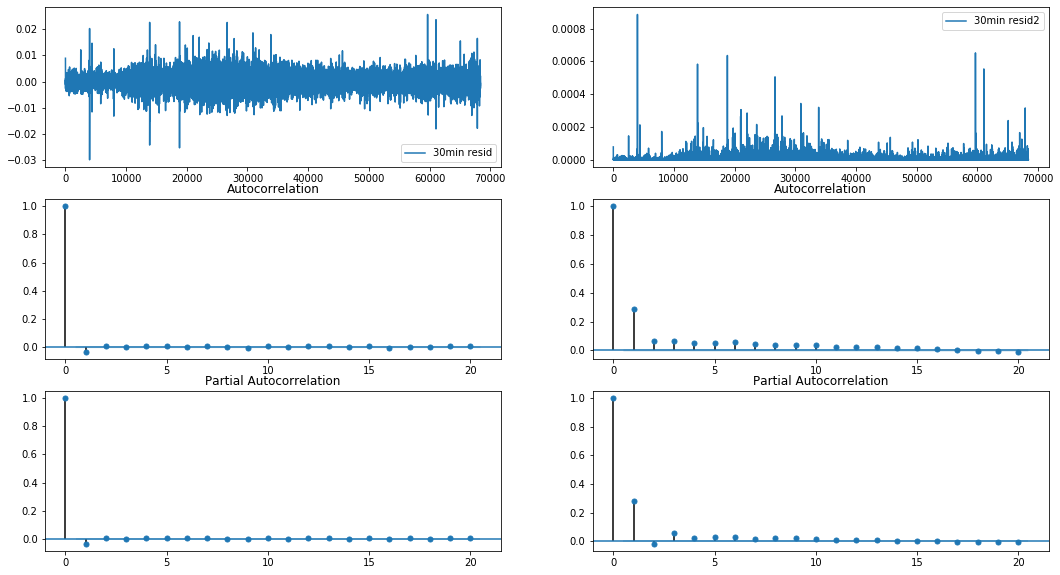

In [229]:
# 30min resid visualization (raw plot, sq plot, acf & pacf plot)
fig = plt.figure(figsize=(2^16,2^8))

ax1 = fig.add_subplot(3,2,1)
ax1.plot(resid_30mr, label="30min resid")
ax1.legend()

ax2 = fig.add_subplot(3,2,2)
ax2.plot(resid2_30mr, label="30min resid2")
ax2.legend()

ax3 = plt.subplot(323)
sm.graphics.tsa.plot_acf(resid_30mr, lags=20, ax=ax3)

ax4 = plt.subplot(324)
sm.graphics.tsa.plot_acf(resid2_30mr, lags=20, ax=ax4)

ax5 = plt.subplot(325)
sm.graphics.tsa.plot_pacf(resid_30mr, lags=20, ax=ax5)

ax6 = plt.subplot(326)
sm.graphics.tsa.plot_pacf(resid2_30mr, lags=20, ax=ax6)

plt.show()

In [230]:
# Resid White Test (Test for Heteroscedastictiy)

from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

# Residual^2 OLS
f_30 = 'data30r~data30r.shift(-1)'
data30mr_ols = ols(formula=f_30, data=data30r).fit()

#white_test
white_test = het_white(data30mr_ols.resid, data30mr_ols.model.exog)

labels = ['LM Statistic', 'LM-Test p-value','F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'LM Statistic': 411.48276411198555, 'LM-Test p-value': 4.442762259287405e-90, 'F-Statistic': 206.97751792109375, 'F-Test p-value': 2.4084239029557814e-90}


In [232]:
# GARCH fitting
data30mr_GARCH = arch_model(resid2_30mr, mean='Constant', vol='GARCH', p=1, q=1, dist='Normal', rescale=False)
data30mr_GARCH_fit = data30mr_GARCH.fit()
print(data30mr_GARCH_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: -694067.6677507501
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -694067.6679037237
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                694068.
Distribution:                  Normal   AIC:                      -1.38813e+06
Method:            Maximum Likelihood   BIC:                      -1.38809e+06
                                        No. Observations:                68400
Date:                Sun, Oct 20 2019   Df Residuals:                    68396
Time:                        15:16:27   Df Model:                            4
          

C:\Users\dip\Anaconda3\lib\site-packages\arch\univariate\base.py:605: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


In [507]:
#garch(1,1) volatility fitting
def garplot (ome, a, b, resid2_30mr, data30v):
    
    garchvol = []
    for i in range(0,data30v.shape[0],1):
        gvol = ome + a * resid2_30mr.iloc[i] + b * data30v.iloc[i]
        garchvol.append(gvol[0])
    return np.array(garchvol)

garchvol30=garplot(1.3790e-11, 0.1, 0.8, resid2_30mr, data30v)

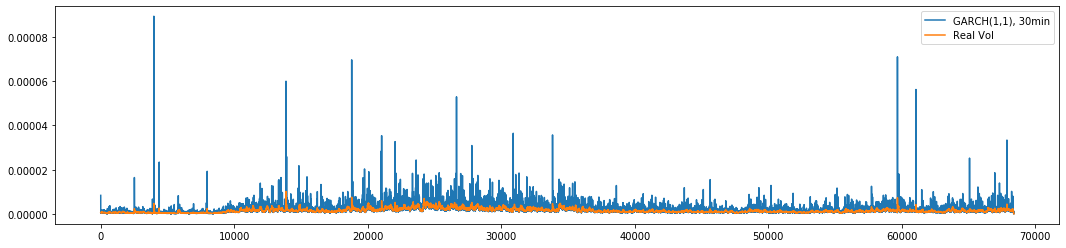

In [508]:
fig = plt.figure(figsize=(2^16,2^6))
plt.plot(garchvol30, label="GARCH(1,1), 30min")
plt.plot(data30v, label="Real Vol")
plt.legend()
plt.show()

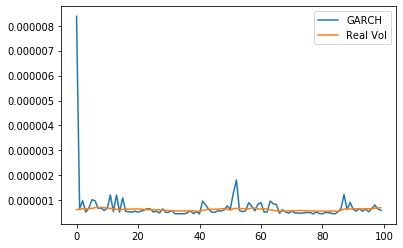

In [522]:
plt.plot(garchvol30[:100], label="GARCH")
plt.plot(data30v[:100], label="Real Vol")
plt.legend()
plt.show()

In [510]:
# 30min GARCH Vol STD
garchvol30_std = garchvol30.reshape(68400,1)
garchvol30_std=garchvol30_std.T[0][:-1]

data30v_std = np.array(data30v)
data30v_std=data30v_std.T[0][:-1]

garchvol30_std = (garchvol30_std - data30v_std).std()
garchvol30_std

1.148728752430947e-06

In [511]:
garchvol30_sq = (garchvol30_std - data30v_std) ** 2
sum(garchvol30_sq)

5.6677298312005044e-08

In [514]:
sum(data30mr_GARCH_fit.resid**2)

9.432043338070587e-06

# GARCH (Data Freq : 60min)

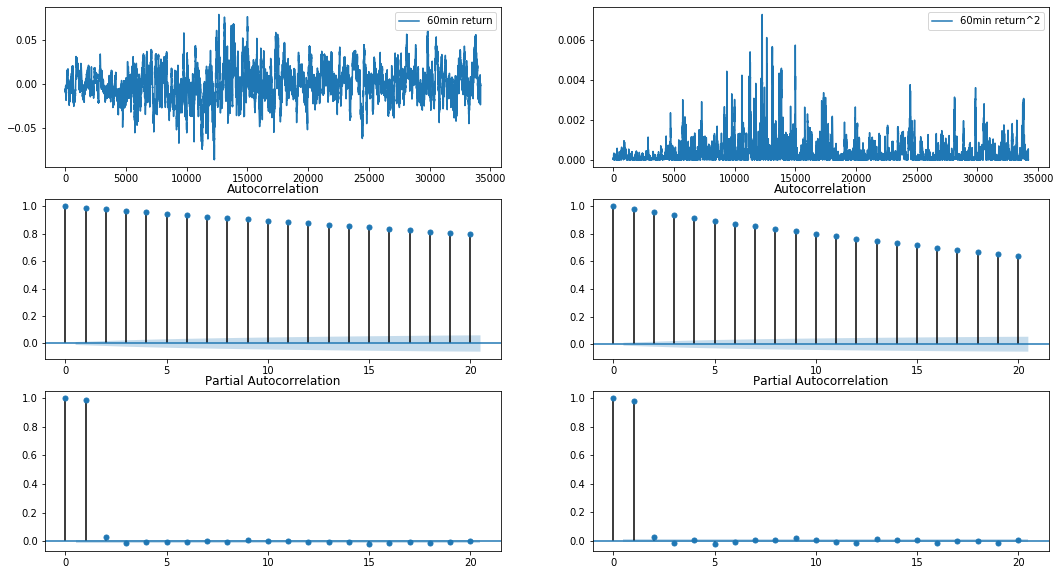

In [236]:
# 60min data visualization (raw plot, sq plot, acf & pacf plot)
fig = plt.figure(figsize=(2^16,2^8))

ax1 = fig.add_subplot(3,2,1)
ax1.plot(data60r, label="60min return")
ax1.legend()

ax2 = fig.add_subplot(3,2,2)
ax2.plot(data60r**2, label="60min return^2")
ax2.legend()

ax3 = plt.subplot(323)
sm.graphics.tsa.plot_acf(data60r, lags=20, ax=ax3)

ax4 = plt.subplot(324)
sm.graphics.tsa.plot_acf(data60r**2, lags=20, ax=ax4)

ax5 = plt.subplot(325)
sm.graphics.tsa.plot_pacf(data60r, lags=20, ax=ax5)

ax6 = plt.subplot(326)
sm.graphics.tsa.plot_pacf(data60r**2, lags=20, ax=ax6)

plt.show()

In [237]:
# 60min return AR(q) fitting
ARIMA_60mr = ARIMA(data60r, order=(1,0,0))
ARIMA_60mr_fit = ARIMA_60mr.fit()
print(ARIMA_60mr_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      0   No. Observations:                34199
Model:                     ARMA(1, 0)   Log Likelihood              151965.239
Method:                       css-mle   S.D. of innovations              0.003
Date:                Sun, 20 Oct 2019   AIC                        -303924.478
Time:                        15:21:06   BIC                        -303899.158
Sample:                             0   HQIC                       -303916.404
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.056e-05      0.001     -0.015      0.988      -0.003       0.003
ar.L1.0        0.9886      0.001   1218.681      0.000       0.987       0.990
                                    Roots           

In [238]:
# 60min resid
resid_60mr = ARIMA_60mr_fit.resid
resid2_60mr = ARIMA_60mr_fit.resid**2

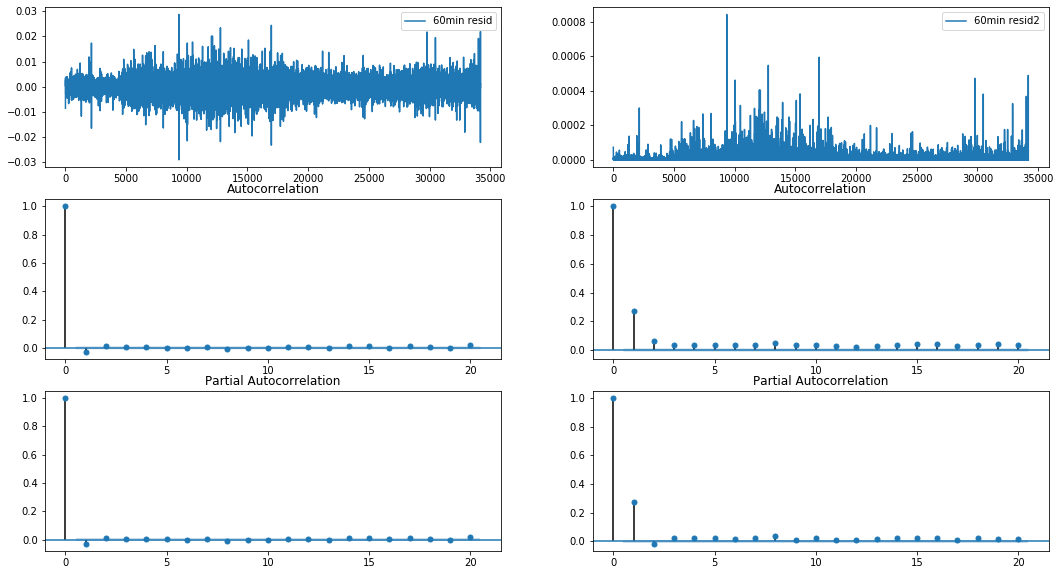

In [239]:
# 60min resid visualization (raw plot, sq plot, acf & pacf plot)
fig = plt.figure(figsize=(2^16,2^8))

ax1 = fig.add_subplot(3,2,1)
ax1.plot(resid_60mr, label="60min resid")
ax1.legend()

ax2 = fig.add_subplot(3,2,2)
ax2.plot(resid2_60mr, label="60min resid2")
ax2.legend()

ax3 = plt.subplot(323)
sm.graphics.tsa.plot_acf(resid_60mr, lags=20, ax=ax3)

ax4 = plt.subplot(324)
sm.graphics.tsa.plot_acf(resid2_60mr, lags=20, ax=ax4)

ax5 = plt.subplot(325)
sm.graphics.tsa.plot_pacf(resid_60mr, lags=20, ax=ax5)

ax6 = plt.subplot(326)
sm.graphics.tsa.plot_pacf(resid2_60mr, lags=20, ax=ax6)

plt.show()

In [240]:
# Resid White Test (Test for Heteroscedastictiy)

from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

# Residual^2 OLS
f_60 = 'data60r~data60r.shift(-1)'
data60mr_ols = ols(formula=f_60, data=data60r).fit()

#white_test
white_test = het_white(data60mr_ols.resid, data60mr_ols.model.exog)

labels = ['LM Statistic', 'LM-Test p-value','F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'LM Statistic': 239.39222089581332, 'LM-Test p-value': 1.0390578486279847e-52, 'F-Statistic': 120.52933746255466, 'F-Test p-value': 6.893120904375957e-53}


In [241]:
# GARCH fitting
data60mr_GARCH = arch_model(resid2_60mr, mean='Constant', vol='GARCH', p=1, q=1, dist='Normal', rescale=False)
data60mr_GARCH_fit = data60mr_GARCH.fit()
print(data60mr_GARCH_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: -325514.8287678591
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -325514.827878981
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                325515.
Distribution:                  Normal   AIC:                          -651022.
Method:            Maximum Likelihood   BIC:                          -650988.
                                        No. Observations:                34199
Date:                Sun, Oct 20 2019   Df Residuals:                    34195
Time:                        15:22:33   Df Model:                            4
           

C:\Users\dip\Anaconda3\lib\site-packages\arch\univariate\base.py:605: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


In [243]:
#garch(1,1) volatility fitting
def garplot (ome, a, b, resid2_60mr, data60v):
    
    garchvol = []
    for i in range(0,data60v.shape[0],1):
        gvol = ome + a * resid2_60mr.iloc[i] + b * data60v.iloc[i]
        garchvol.append(gvol[0])
    return np.array(garchvol)

garchvol60=garplot(8.3029e-12, 0.05, 0.93, resid2_60mr, data60v)

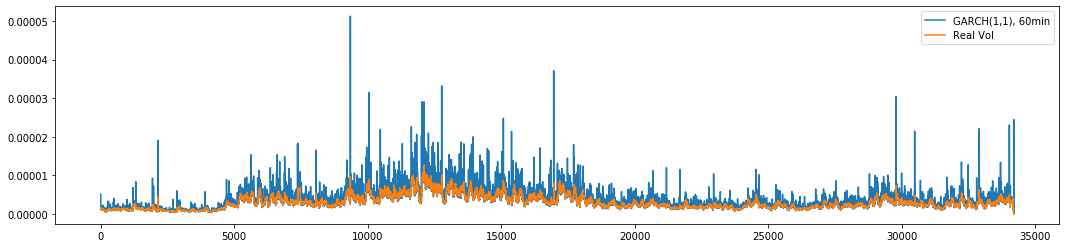

In [526]:
fig = plt.figure(figsize=(2^16,2^6))
plt.plot(garchvol60, label="GARCH(1,1), 60min")
plt.plot(data60v, label="Real Vol")
plt.legend()
plt.show()

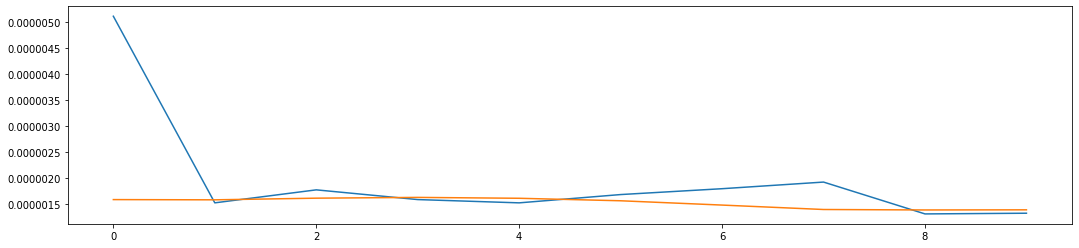

In [497]:
fig = plt.figure(figsize=(2^16,2^6))
plt.plot(garchvol60[:10])
plt.plot(data60v[:10])
plt.show()

In [406]:
np.shape(garchvol60)

(34199,)

In [407]:
# 60min GARCH Vol STD
garchvol60_std = garchvol60.reshape(34199,1)
garchvol60_std = garchvol60_std.T[0][:-1]

data60v_std = np.array(data60v)
data60v_std = data60v_std.T[0][:-1]

garchvol60_std = (garchvol60_std - data60v_std).std()
garchvol60_std

9.97384031908035e-07

In [477]:
garchvol60_sq = (garchvol60_std - data60v_std) ** 2
sum(garchvol60_sq)

2.3844543299707686e-07

In [515]:
sum(data60mr_GARCH_fit.resid**2)

1.419747954478055e-05

# GARCH (Data Freq : 300min)

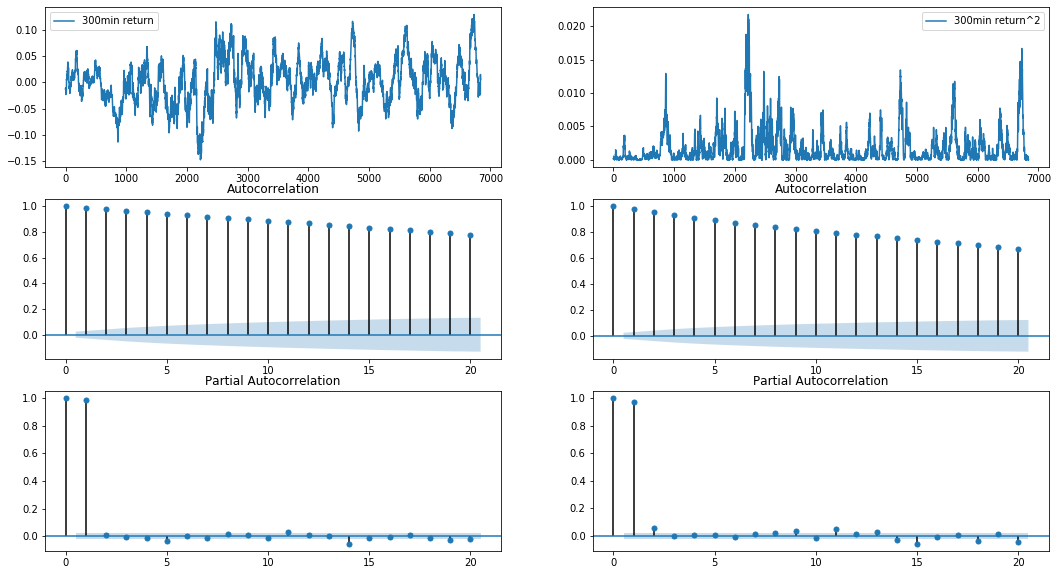

In [245]:
# 300min data visualization (raw plot, sq plot, acf & pacf plot)
fig = plt.figure(figsize=(2^16,2^8))

ax1 = fig.add_subplot(3,2,1)
ax1.plot(data300r, label="300min return")
ax1.legend()

ax2 = fig.add_subplot(3,2,2)
ax2.plot(data300r**2, label="300min return^2")
ax2.legend()

ax3 = plt.subplot(323)
sm.graphics.tsa.plot_acf(data300r, lags=20, ax=ax3)

ax4 = plt.subplot(324)
sm.graphics.tsa.plot_acf(data300r**2, lags=20, ax=ax4)

ax5 = plt.subplot(325)
sm.graphics.tsa.plot_pacf(data300r, lags=20, ax=ax5)

ax6 = plt.subplot(326)
sm.graphics.tsa.plot_pacf(data300r**2, lags=20, ax=ax6)

plt.show()

In [246]:
# 300min return AR(q) fitting
ARIMA_300mr = ARIMA(data300r, order=(1,0,0))
ARIMA_300mr_fit = ARIMA_300mr.fit()
print(ARIMA_300mr_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      0   No. Observations:                 6839
Model:                     ARMA(1, 0)   Log Likelihood               24930.284
Method:                       css-mle   S.D. of innovations              0.006
Date:                Sun, 20 Oct 2019   AIC                         -49854.568
Time:                        15:26:27   BIC                         -49834.076
Sample:                             0   HQIC                        -49847.498
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.007      0.232      0.816      -0.011       0.014
ar.L1.0        0.9885      0.002    548.329      0.000       0.985       0.992
                                    Roots           

In [247]:
# 300min resid
resid_300mr = ARIMA_300mr_fit.resid
resid2_300mr = ARIMA_300mr_fit.resid**2

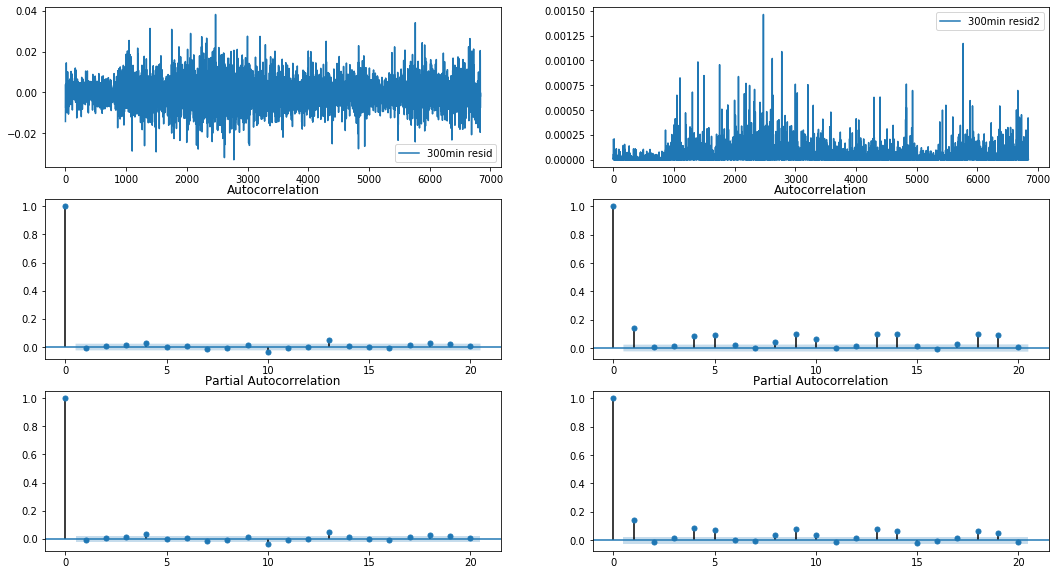

In [249]:
# 300min resid visualization (raw plot, sq plot, acf & pacf plot)
fig = plt.figure(figsize=(2^16,2^8))

ax1 = fig.add_subplot(3,2,1)
ax1.plot(resid_300mr, label="300min resid")
ax1.legend()

ax2 = fig.add_subplot(3,2,2)
ax2.plot(resid2_300mr, label="300min resid2")
ax2.legend()

ax3 = plt.subplot(323)
sm.graphics.tsa.plot_acf(resid_300mr, lags=20, ax=ax3)

ax4 = plt.subplot(324)
sm.graphics.tsa.plot_acf(resid2_300mr, lags=20, ax=ax4)

ax5 = plt.subplot(325)
sm.graphics.tsa.plot_pacf(resid_300mr, lags=20, ax=ax5)

ax6 = plt.subplot(326)
sm.graphics.tsa.plot_pacf(resid2_300mr, lags=20, ax=ax6)

plt.show()

In [250]:
# Resid White Test (Test for Heteroscedastictiy)

from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

# Residual^2 OLS
f_300 = 'data300r~data300r.shift(-1)'
data300mr_ols = ols(formula=f_300, data=data300r).fit()

#white_test
white_test = het_white(data300mr_ols.resid, data300mr_ols.model.exog)

labels = ['LM Statistic', 'LM-Test p-value','F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'LM Statistic': 35.55177965509702, 'LM-Test p-value': 1.90558856030775e-08, 'F-Statistic': 17.860952856342788, 'F-Test p-value': 1.8335233441653338e-08}


In [512]:
# GARCH fitting
data300mr_GARCH = arch_model(resid2_300mr, mean='Constant', vol='GARCH', p=1, q=1, dist='Normal', rescale=False)
data300mr_GARCH_fit = data300mr_GARCH.fit()
print(data300mr_GARCH_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: -55071.01315380182
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -55071.01300299688
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                55071.0
Distribution:                  Normal   AIC:                          -110134.
Method:            Maximum Likelihood   BIC:                          -110107.
                                        No. Observations:                 6839
Date:                Sun, Oct 20 2019   Df Residuals:                     6835
Time:                        17:40:54   Df Model:                            4
          

C:\Users\dip\Anaconda3\lib\site-packages\arch\univariate\base.py:605: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


In [253]:
#garch(1,1) volatility fitting
def garplot (ome, a, b, resid2_300mr, data300v):
    
    garchvol = []
    for i in range(0,data300v.shape[0],1):
        gvol = ome + a * resid2_300mr.iloc[i] + b * data300v.iloc[i]
        garchvol.append(gvol[0])
    return np.array(garchvol)

garchvol300=garplot(1.3497e-10, 0.05, 0.93, resid2_300mr, data300v)

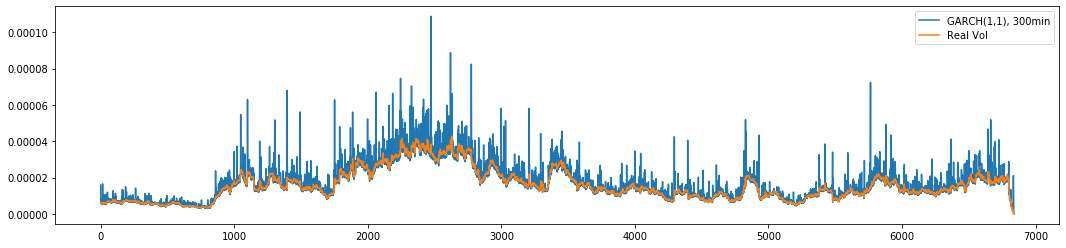

In [489]:
fig = plt.figure(figsize=(2^16,2^6))
plt.plot(garchvol300, label="GARCH(1,1), 300min")
plt.plot(data300v, label="Real Vol")
plt.legend()
plt.show()

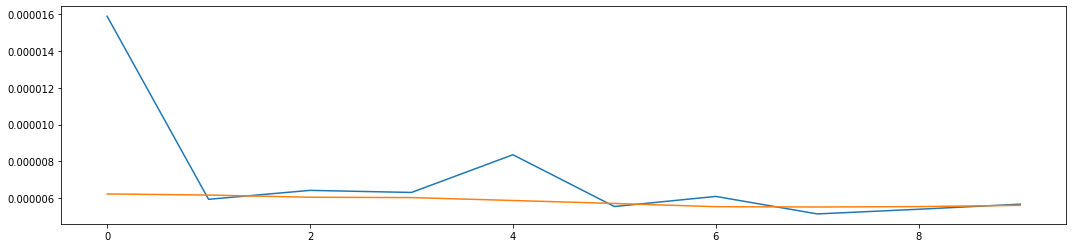

In [498]:
fig = plt.figure(figsize=(2^16,2^6))
plt.plot(garchvol300[:10])
plt.plot(data300v[:10])
plt.show()

In [408]:
np.shape(garchvol300)

(6839,)

In [409]:
# 300min GARCH Vol STD
garchvol300_std = garchvol300.reshape(6839,1)
garchvol300_std = garchvol300_std.T[0][:-1]

data300v_std = np.array(data300v)
data300v_std = data300v_std.T[0][:-1]

garchvol300_std = (garchvol300_std - data300v_std).std()
garchvol300_std

4.01455626452713e-06

In [478]:
garchvol300_sq = (garchvol300_std - data300v_std) ** 2
sum(garchvol300_sq)

1.4267807425726185e-06

In [516]:
sum(data300mr_GARCH_fit.resid**2)

4.615403597823927e-05

# GARCH (Data Freq : 600min)

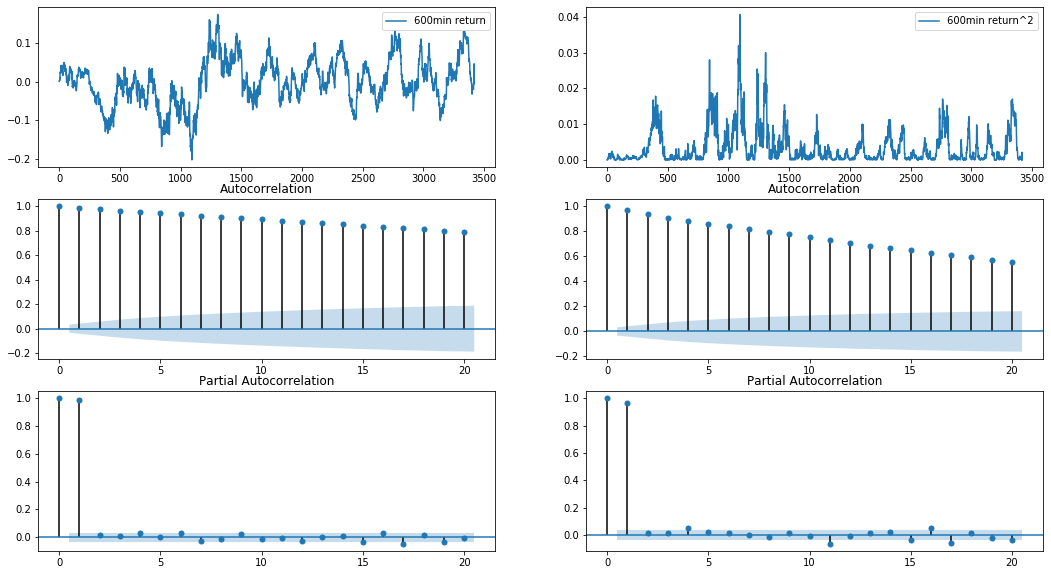

In [255]:
# 600min data visualization (raw plot, sq plot, acf & pacf plot)
fig = plt.figure(figsize=(2^16,2^8))

ax1 = fig.add_subplot(3,2,1)
ax1.plot(data600r, label="600min return")
ax1.legend()

ax2 = fig.add_subplot(3,2,2)
ax2.plot(data600r**2, label="600min return^2")
ax2.legend()

ax3 = plt.subplot(323)
sm.graphics.tsa.plot_acf(data600r, lags=20, ax=ax3)

ax4 = plt.subplot(324)
sm.graphics.tsa.plot_acf(data600r**2, lags=20, ax=ax4)

ax5 = plt.subplot(325)
sm.graphics.tsa.plot_pacf(data600r, lags=20, ax=ax5)

ax6 = plt.subplot(326)
sm.graphics.tsa.plot_pacf(data600r**2, lags=20, ax=ax6)

plt.show()

In [257]:
# 600min return AR(q) fitting
ARIMA_600mr = ARIMA(data600r, order=(1,0,0))
ARIMA_600mr_fit = ARIMA_600mr.fit()
print(ARIMA_600mr_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      0   No. Observations:                 3419
Model:                     ARMA(1, 0)   Log Likelihood               11214.214
Method:                       css-mle   S.D. of innovations              0.009
Date:                Sun, 20 Oct 2019   AIC                         -22422.429
Time:                        15:35:19   BIC                         -22404.017
Sample:                             0   HQIC                        -22415.850
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.012      0.015      0.988      -0.023       0.024
ar.L1.0        0.9874      0.003    372.616      0.000       0.982       0.993
                                    Roots           

In [258]:
# 600min resid
resid_600mr = ARIMA_600mr_fit.resid
resid2_600mr = ARIMA_600mr_fit.resid**2

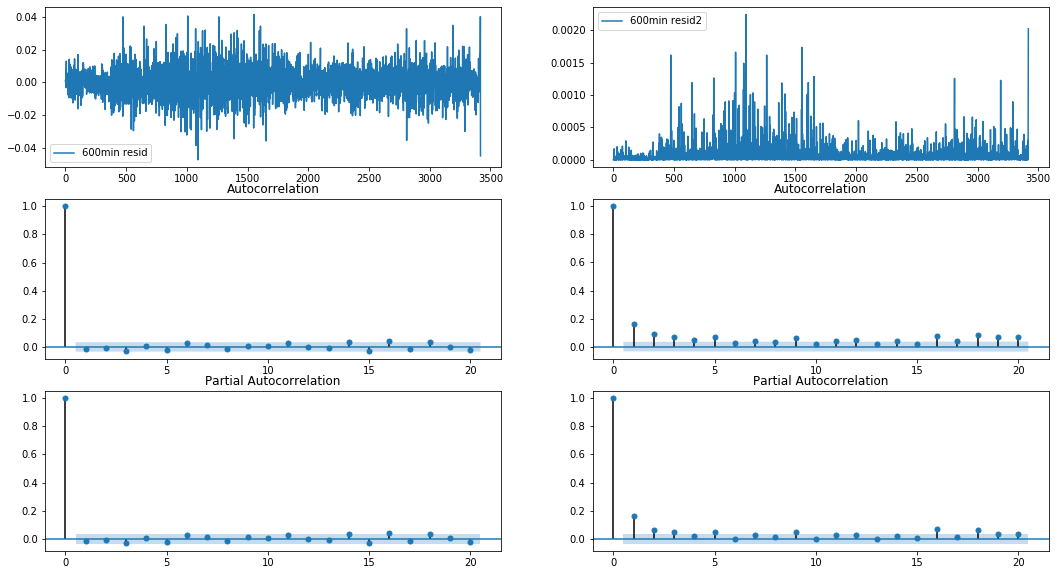

In [259]:
# 600min resid visualization (raw plot, sq plot, acf & pacf plot)
fig = plt.figure(figsize=(2^16,2^8))

ax1 = fig.add_subplot(3,2,1)
ax1.plot(resid_600mr, label="600min resid")
ax1.legend()

ax2 = fig.add_subplot(3,2,2)
ax2.plot(resid2_600mr, label="600min resid2")
ax2.legend()

ax3 = plt.subplot(323)
sm.graphics.tsa.plot_acf(resid_600mr, lags=20, ax=ax3)

ax4 = plt.subplot(324)
sm.graphics.tsa.plot_acf(resid2_600mr, lags=20, ax=ax4)

ax5 = plt.subplot(325)
sm.graphics.tsa.plot_pacf(resid_600mr, lags=20, ax=ax5)

ax6 = plt.subplot(326)
sm.graphics.tsa.plot_pacf(resid2_600mr, lags=20, ax=ax6)

plt.show()

In [270]:
# Resid White Test (Test for Heteroscedastictiy)

from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

# Residual^2 OLS
f_600 = 'data600r~data600r.shift(-1)'
data600mr_ols = ols(formula=f_600, data=data600r).fit()

#white_test
white_test = het_white(data600mr_ols.resid, data600mr_ols.model.exog)

labels = ['LM Statistic', 'LM-Test p-value','F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'LM Statistic': 44.191585726118234, 'LM-Test p-value': 2.534656352934494e-10, 'F-Statistic': 22.3655653676431, 'F-Test p-value': 2.2378057068653769e-10}


In [261]:
# GARCH fitting
data600mr_GARCH = arch_model(resid2_600mr, mean='Constant', vol='GARCH', p=1, q=1, dist='Normal', rescale=False)
data600mr_GARCH_fit = data600mr_GARCH.fit()
print(data600mr_GARCH_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: -25380.373396953004
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -25380.373344379102
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                25380.4
Distribution:                  Normal   AIC:                          -50752.7
Method:            Maximum Likelihood   BIC:                          -50728.2
                                        No. Observations:                 3419
Date:                Sun, Oct 20 2019   Df Residuals:                     3415
Time:                        15:37:08   Df Model:                            4
        

C:\Users\dip\Anaconda3\lib\site-packages\arch\univariate\base.py:605: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


In [262]:
#garch(1,1) volatility fitting
def garplot (ome, a, b, resid2_600mr, data600v):
    
    garchvol = []
    for i in range(0,data600v.shape[0],1):
        gvol = ome + a * resid2_600mr.iloc[i] + b * data600v.iloc[i]
        garchvol.append(gvol[0])
    return np.array(garchvol)

garchvol600=garplot(5.1043e-10, 0.05, 0.93, resid2_600mr, data600v)

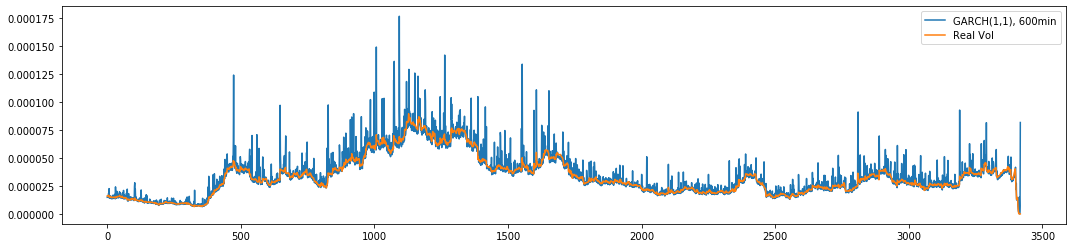

In [490]:
fig = plt.figure(figsize=(2^16,2^6))
plt.plot(garchvol600, label="GARCH(1,1), 600min")
plt.plot(data600v, label="Real Vol")
plt.legend()
plt.show()

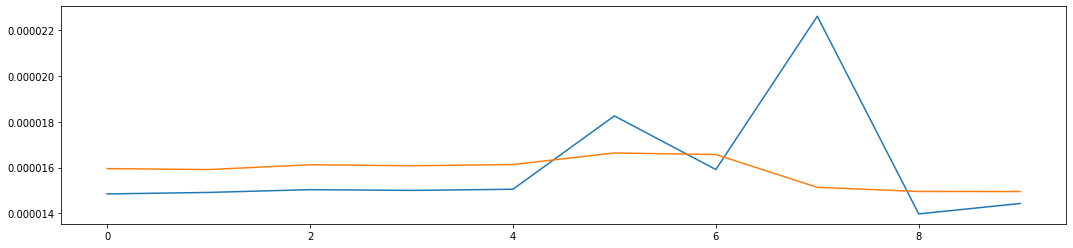

In [499]:
fig = plt.figure(figsize=(2^16,2^6))
plt.plot(garchvol600[:10])
plt.plot(data600v[:10])
plt.show()

In [411]:
np.shape(garchvol600)

(3419,)

In [412]:
# 600min GARCH Vol STD
garchvol600_std = garchvol600.reshape(3419,1)
garchvol600_std = garchvol600_std.T[0][:-1]

data600v_std = np.array(data600v)
data600v_std = data600v_std.T[0][:-1]

garchvol600_std = (garchvol600_std - data600v_std).std()
garchvol600_std

7.61672755032283e-06

In [479]:
garchvol600_sq = (garchvol600_std - data600v_std) ** 2
sum(garchvol600_sq)

3.193266064739152e-06

In [517]:
sum(data600mr_GARCH_fit.resid**2)

8.725753482379037e-05

# GARCH (Data Freq : 1440min)

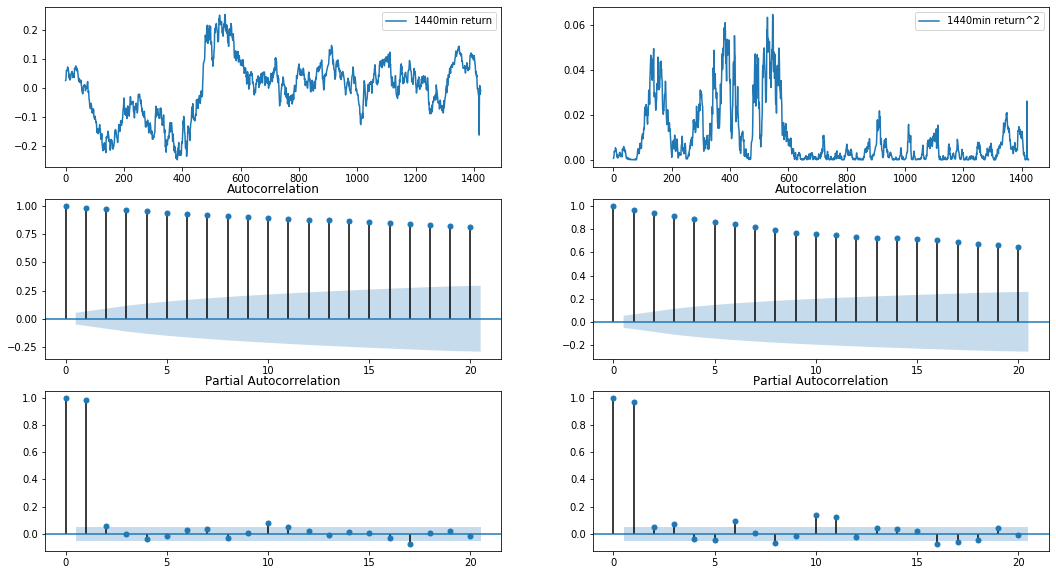

In [264]:
# 1440min data visualization (raw plot, sq plot, acf & pacf plot)
fig = plt.figure(figsize=(2^16,2^8))

ax1 = fig.add_subplot(3,2,1)
ax1.plot(data1440r, label="1440min return")
ax1.legend()

ax2 = fig.add_subplot(3,2,2)
ax2.plot(data1440r**2, label="1440min return^2")
ax2.legend()

ax3 = plt.subplot(323)
sm.graphics.tsa.plot_acf(data1440r, lags=20, ax=ax3)

ax4 = plt.subplot(324)
sm.graphics.tsa.plot_acf(data1440r**2, lags=20, ax=ax4)

ax5 = plt.subplot(325)
sm.graphics.tsa.plot_pacf(data1440r, lags=20, ax=ax5)

ax6 = plt.subplot(326)
sm.graphics.tsa.plot_pacf(data1440r**2, lags=20, ax=ax6)

plt.show()

In [265]:
# 1440min return AR(q) fitting
ARIMA_1440mr = ARIMA(data1440r, order=(1,0,0))
ARIMA_1440mr_fit = ARIMA_1440mr.fit()
print(ARIMA_1440mr_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      0   No. Observations:                 1424
Model:                     ARMA(1, 0)   Log Likelihood                3924.333
Method:                       css-mle   S.D. of innovations              0.015
Date:                Sun, 20 Oct 2019   AIC                          -7842.666
Time:                        15:39:23   BIC                          -7826.882
Sample:                             0   HQIC                         -7836.771
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.031      0.049      0.961      -0.060       0.063
ar.L1.0        0.9876      0.004    250.208      0.000       0.980       0.995
                                    Roots           

In [266]:
# 1440min resid
resid_1440mr = ARIMA_1440mr_fit.resid
resid2_1440mr = ARIMA_1440mr_fit.resid**2

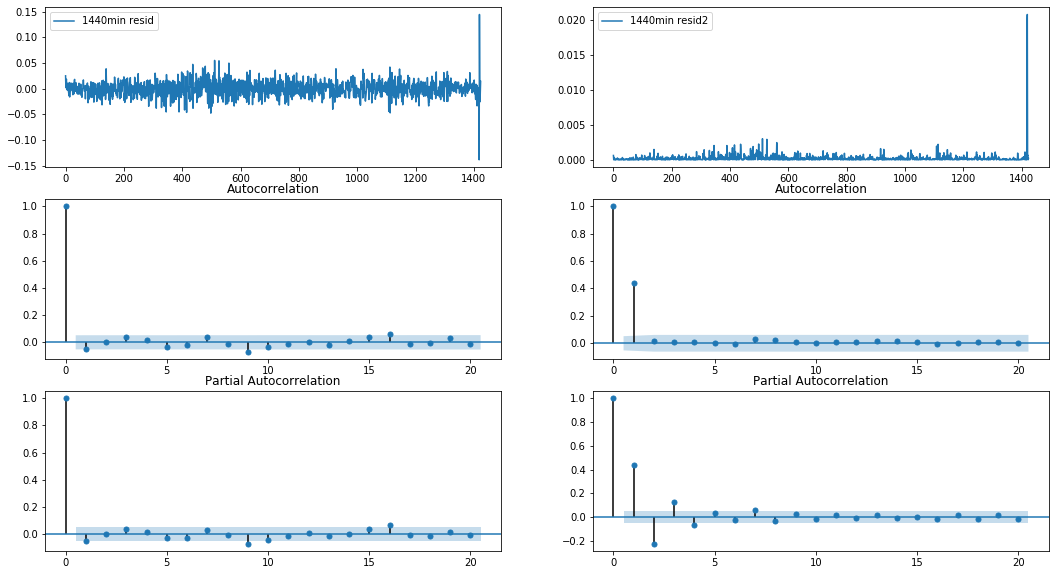

In [267]:
# 600min resid visualization (raw plot, sq plot, acf & pacf plot)
fig = plt.figure(figsize=(2^16,2^8))

ax1 = fig.add_subplot(3,2,1)
ax1.plot(resid_1440mr, label="1440min resid")
ax1.legend()

ax2 = fig.add_subplot(3,2,2)
ax2.plot(resid2_1440mr, label="1440min resid2")
ax2.legend()

ax3 = plt.subplot(323)
sm.graphics.tsa.plot_acf(resid_1440mr, lags=20, ax=ax3)

ax4 = plt.subplot(324)
sm.graphics.tsa.plot_acf(resid2_1440mr, lags=20, ax=ax4)

ax5 = plt.subplot(325)
sm.graphics.tsa.plot_pacf(resid_1440mr, lags=20, ax=ax5)

ax6 = plt.subplot(326)
sm.graphics.tsa.plot_pacf(resid2_1440mr, lags=20, ax=ax6)

plt.show()

In [269]:
# Resid White Test (Test for Heteroscedastictiy)

from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

# Residual^2 OLS
f_1440 = 'data1440r~data1440r.shift(-1)'
data1440mr_ols = ols(formula=f_1440, data=data1440r).fit()

#white_test
white_test = het_white(data1440mr_ols.resid, data1440mr_ols.model.exog)

labels = ['LM Statistic', 'LM-Test p-value','F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'LM Statistic': 5.280529412056807, 'LM-Test p-value': 0.07134238229803581, 'F-Statistic': 2.644511809522891, 'F-Test p-value': 0.07138988794954958}


In [466]:
# GARCH fitting
data1440mr_GARCH = arch_model(resid2_1440mr, mean='Constant', vol='GARCH', p=1, q=1, dist='Normal', rescale=False)
data1440mr_GARCH_fit = data1440mr_GARCH.fit()
print(data1440mr_GARCH_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: -8523.559570457222
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -8523.559571458725
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8523.56
Distribution:                  Normal   AIC:                          -17039.1
Method:            Maximum Likelihood   BIC:                          -17018.1
                                        No. Observations:                 1424
Date:                Sun, Oct 20 2019   Df Residuals:                     1420
Time:                        17:09:16   Df Model:                            4
          

C:\Users\dip\Anaconda3\lib\site-packages\arch\univariate\base.py:605: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


In [549]:
#garch(1,1) volatility fitting
def garplot (ome, a, b, resid2_1440mr, data1440v):
    
    garchvol = []
    for i in range(0,data1440v.shape[0],1):
        gvol = ome + a * resid2_1440mr.iloc[i] + b * data1440v.iloc[i]
        garchvol.append(gvol[0])
    return np.array(garchvol)

garchvol1440=garplot(6.5682e-08, 0, 0.8, resid2_1440mr, data1440v)

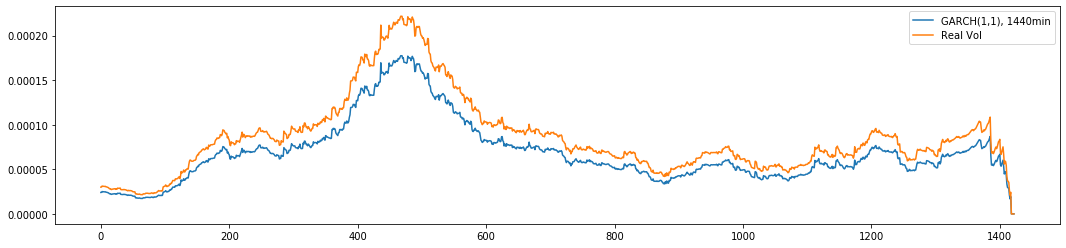

In [550]:
fig = plt.figure(figsize=(2^16,2^6))
plt.plot(garchvol1440, label="GARCH(1,1), 1440min")
plt.plot(data1440v, label="Real Vol")
plt.legend()
plt.show()

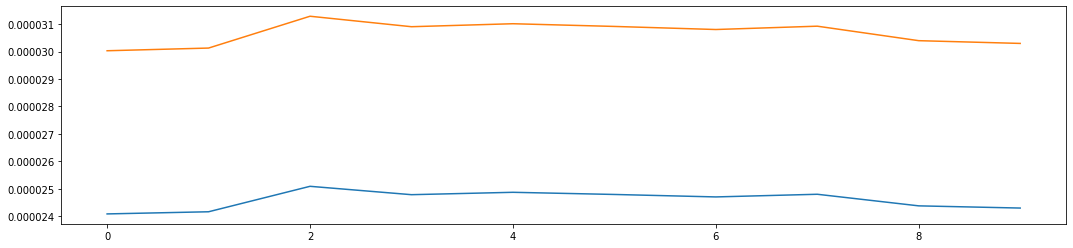

In [551]:
fig = plt.figure(figsize=(2^16,2^6))
plt.plot(garchvol1440[:10])
plt.plot(data1440v[:10])
plt.show()

In [552]:
np.shape(garchvol1440)

(1424,)

In [553]:
# 600min GARCH Vol STD
garchvol1440_std = garchvol1440.reshape(1424,1)
garchvol1440_std = garchvol1440_std.T[0][:-1]

data1440v_std = np.array(data1440v)
data1440v_std = data1440v_std.T[0][:-1]

garchvol1440_std = (garchvol1440_std - data1440v_std).std()
garchvol1440_std

8.67344681550712e-06

In [554]:
garchvol1440_sq = (garchvol1440_std - data1440v_std) ** 2
sum(garchvol1440_sq)

1.1077249692474463e-05

In [555]:
sum(data1440mr_GARCH_fit.resid**2)

0.0009353175956423789